In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df['sex']= df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] =  df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
import matplotlib.pyplot as plt
for col in df.columns:
    plt.figure()
    plt.hist(df[col])
    plt.title(col, color = "White")
    plt.xticks(color = "White")
    plt.yticks(color = "White")

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
X = df.drop(['charges'], axis =1)
y = df.charges
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
dt_clf = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(418.5, 713.475, 'smoker <= 0.5\nmse = 146468393.299\nsamples = 936\nvalue = 13379.157'),
 Text(209.25, 509.625, 'age <= 42.5\nmse = 37221997.558\nsamples = 741\nvalue = 8542.875'),
 Text(104.625, 305.775, 'age <= 22.5\nmse = 21618064.588\nsamples = 413\nvalue = 5409.331'),
 Text(52.3125, 101.92499999999995, 'mse = 19696578.22\nsamples = 121\nvalue = 3233.463'),
 Text(156.9375, 101.92499999999995, 'mse = 19639476.63\nsamples = 292\nvalue = 6310.975'),
 Text(313.875, 305.775, 'age <= 52.5\nmse = 28938262.494\nsamples = 328\nvalue = 12488.466'),
 Text(261.5625, 101.92499999999995, 'mse = 24342176.216\nsamples = 148\nvalue = 10595.861'),
 Text(366.1875, 101.92499999999995, 'mse = 27350528.287\nsamples = 180\nvalue = 14044.608'),
 Text(627.75, 509.625, 'bmi <= 29.972\nmse = 134977942.179\nsamples = 195\nvalue = 31757.029'),
 Text(523.125, 305.775, 'age <= 41.0\nmse = 24643421.678\nsamples = 95\nvalue = 21261.647'),
 Text(470.8125, 101.92499999999995, 'mse = 10661679.718\nsamples = 57\

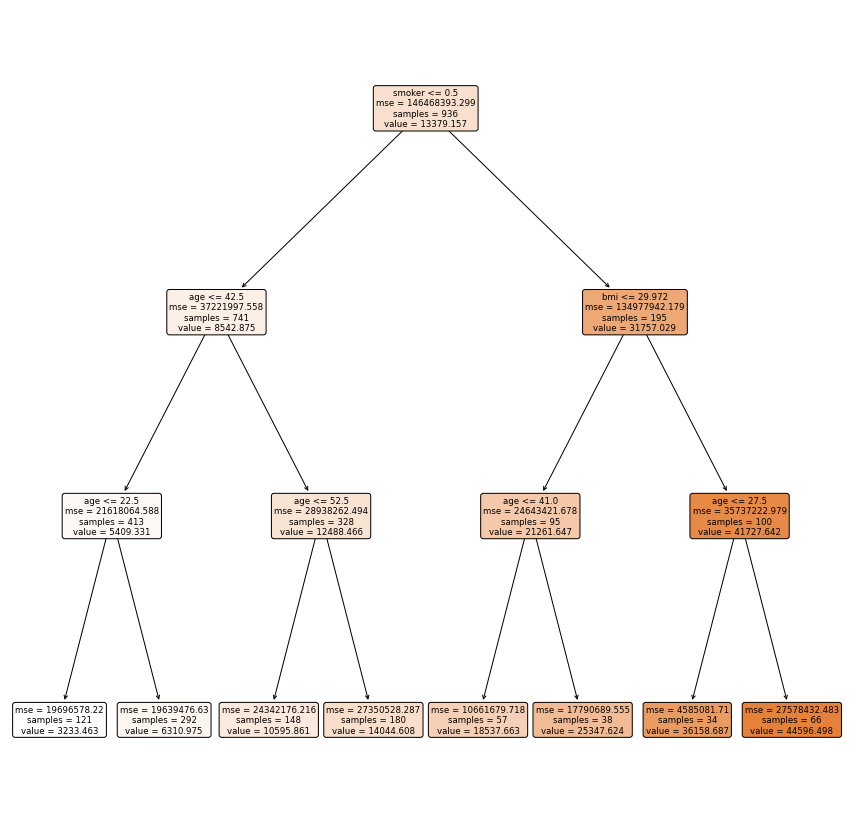

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dt_clf, 
        filled=True, 
        rounded=True,
        feature_names=X.columns)

In [32]:
y_pred = dt_clf.predict(X_test)
r2_score(y_test, y_pred)

0.8439713638273123